In [90]:
# Use case: to develop a machine learning model for the wine dataset using PCA to form clusters
import pandas as pd
df=pd.read_csv("/content/wine.csv")
df


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [91]:
df.shape                #EDA process 1 about the data

(178, 14)

In [92]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [94]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [124]:
df.isnull().sum()       # no null values

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


In [96]:
z=df.corr(numeric_only=True)
z

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


<Axes: >

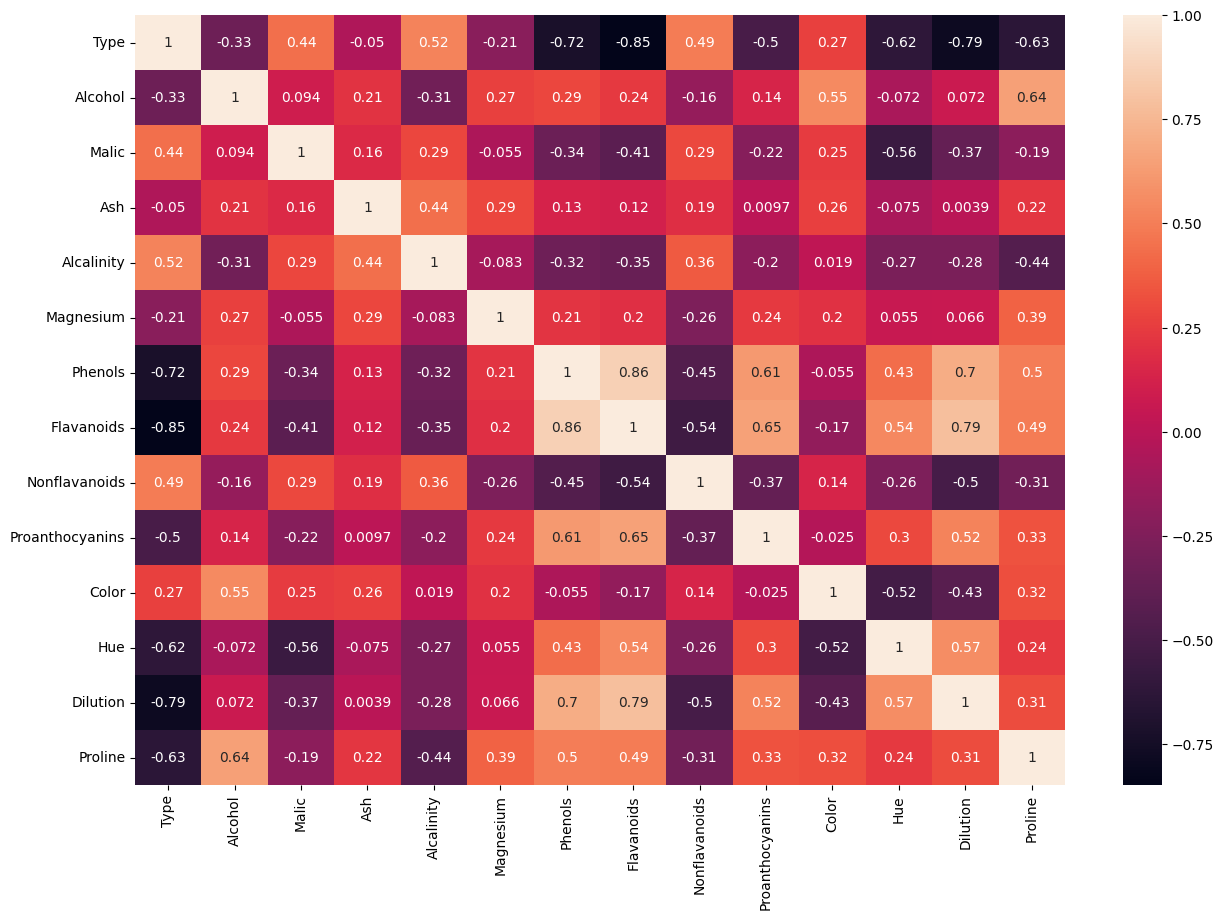

In [97]:
import seaborn as sns                    #relation of the dataset using heatmap from seaborn
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(z,annot=True)

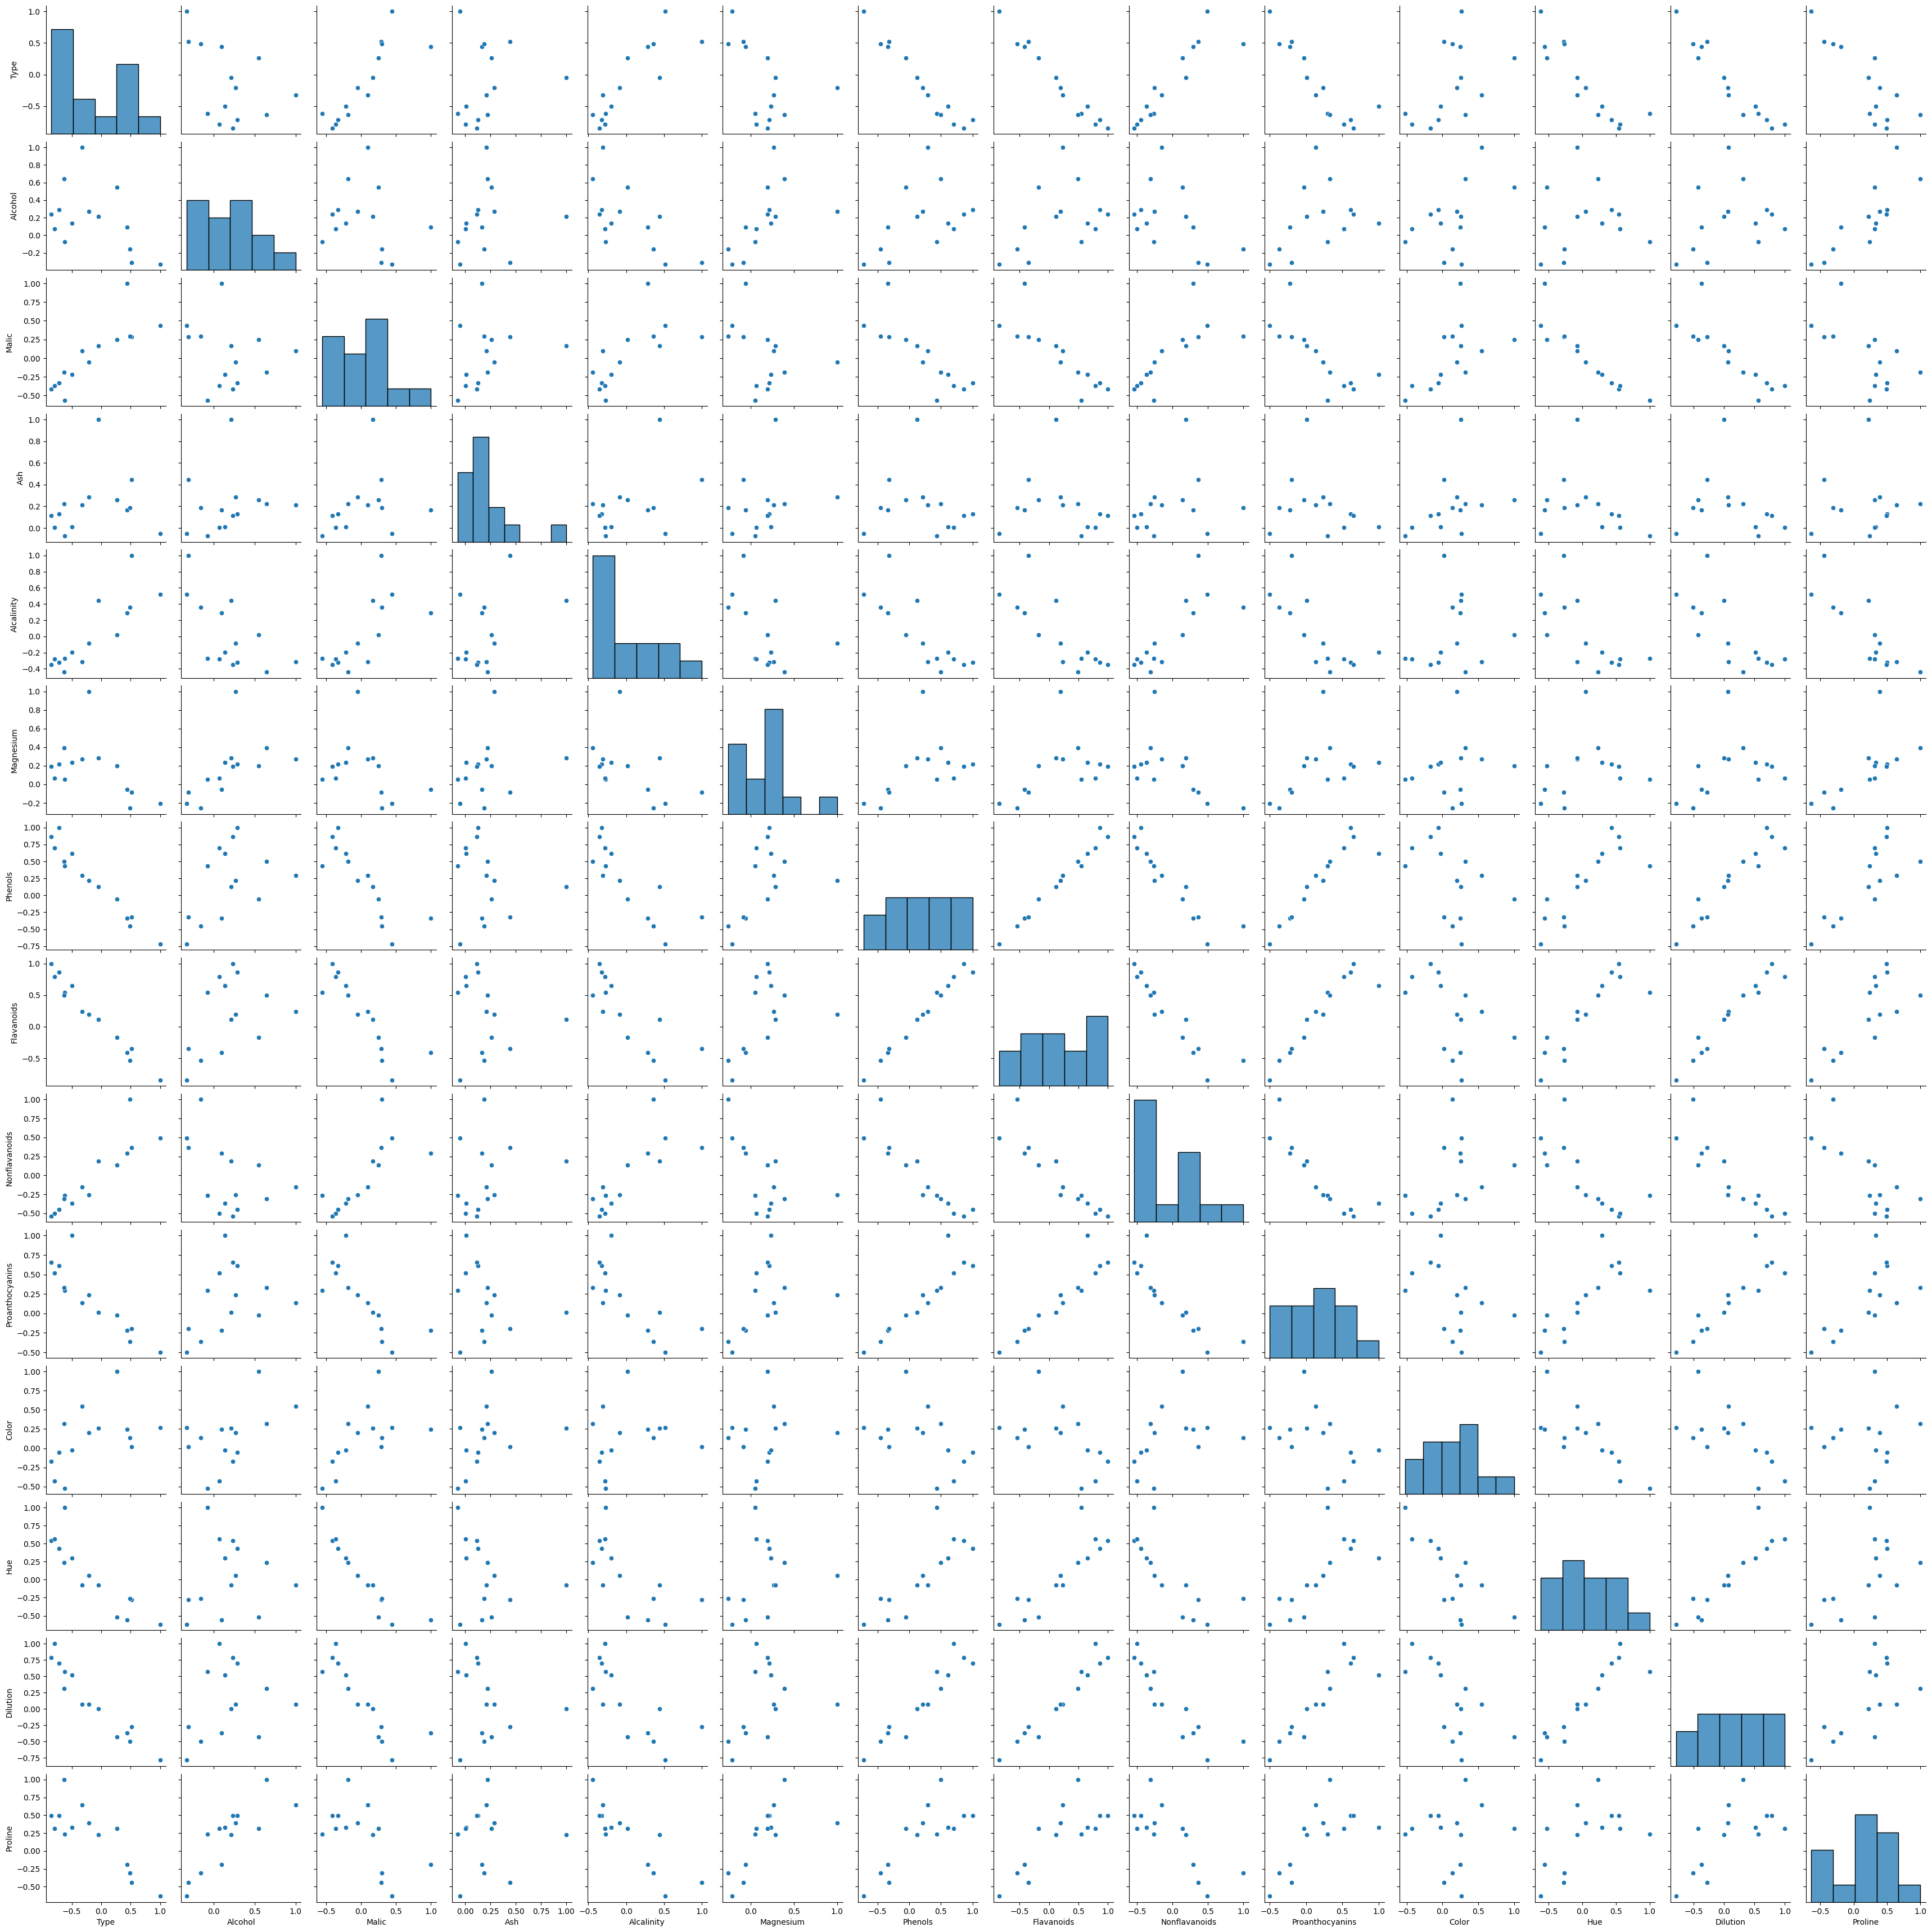

In [98]:
sns.pairplot(z)         #correlation of the data using pairplot

array([[<Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic'}>,
        <Axes: title={'center': 'Ash'}>,
        <Axes: title={'center': 'Alcalinity'}>],
       [<Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>,
        <Axes: title={'center': 'Nonflavanoids'}>,
        <Axes: title={'center': 'Proanthocyanins'}>],
       [<Axes: title={'center': 'Color'}>,
        <Axes: title={'center': 'Hue'}>,
        <Axes: title={'center': 'Dilution'}>,
        <Axes: title={'center': 'Proline'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes:

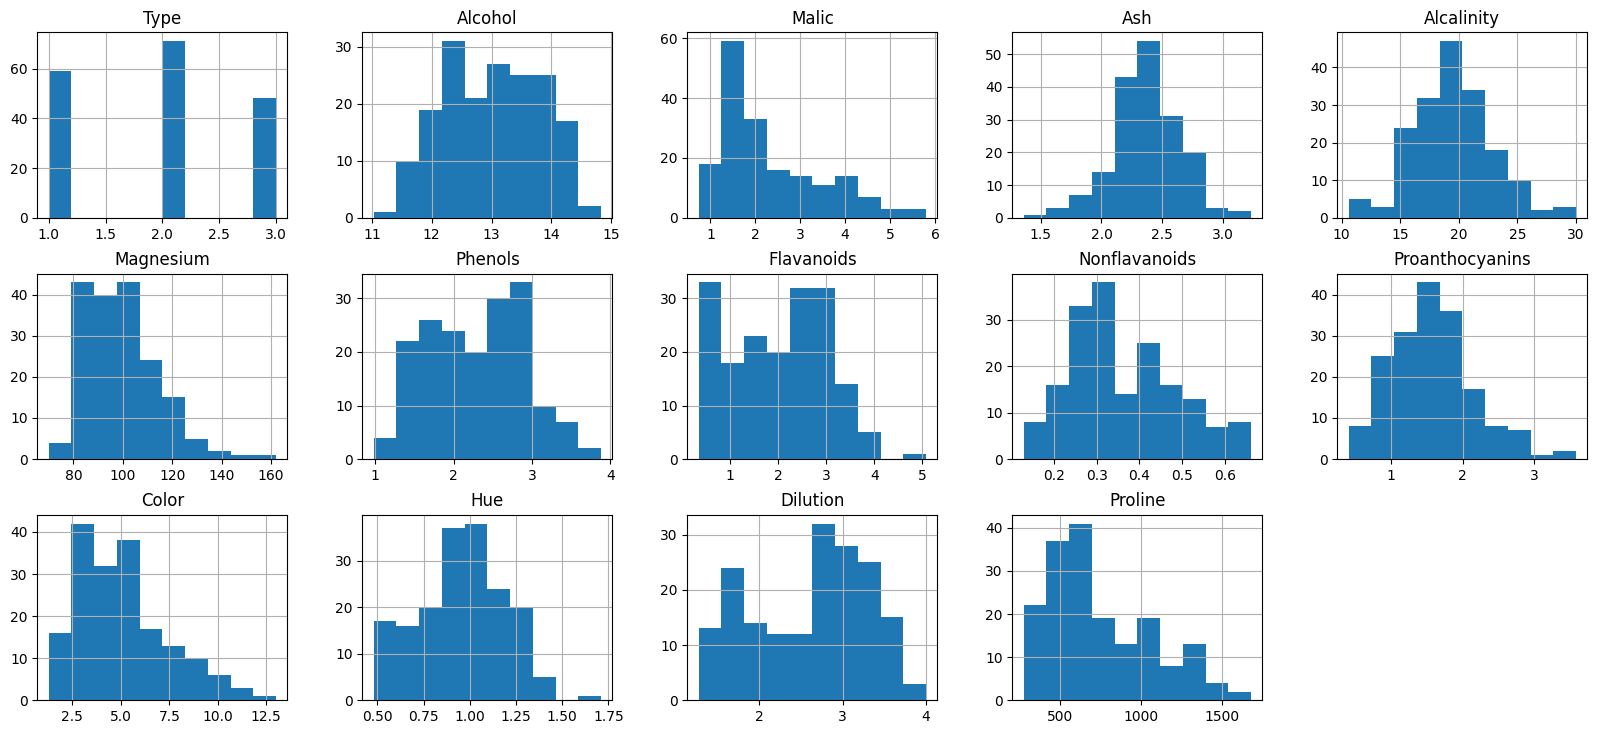

In [99]:
df.hist(figsize=(20,40),layout=(13,5))            #visualization using histogram to understand the dataset deeper

In [100]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [101]:
x=df.drop('Type', axis=1)             #defining the input variable because in unsupervised learning we dont require output prediction. We follow only the clusters of the result
x

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [102]:
print("Input Dataframe Shape",x.shape)

Input Dataframe Shape (178, 13)


In [103]:
x_mean=x.mean()        #finding mean
x_std=x.std()          #finding standard deviation
z=(x-x_mean)/x_std     #Standardization
z

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.873810,2.966176,0.304301,0.300954,-0.331985,-0.982841,-1.420891,1.270726,-0.927563,1.139596,-1.388840,-1.227742,-0.021890
174,0.491955,1.408636,0.413653,1.049555,0.158126,-0.791103,-1.280731,0.547563,-0.316058,0.967055,-1.126341,-1.481267,0.009866
175,0.331822,1.739837,-0.388260,0.151234,1.418411,-1.126646,-1.340800,0.547563,-0.420888,2.217979,-1.607590,-1.481267,0.279786
176,0.208643,0.227053,0.012696,0.151234,1.418411,-1.030776,-1.350811,1.351077,-0.228701,1.829761,-1.563840,-1.396759,0.295664


In [104]:
cov=z.cov()        #finding covariance matrix
cov

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


<Axes: >

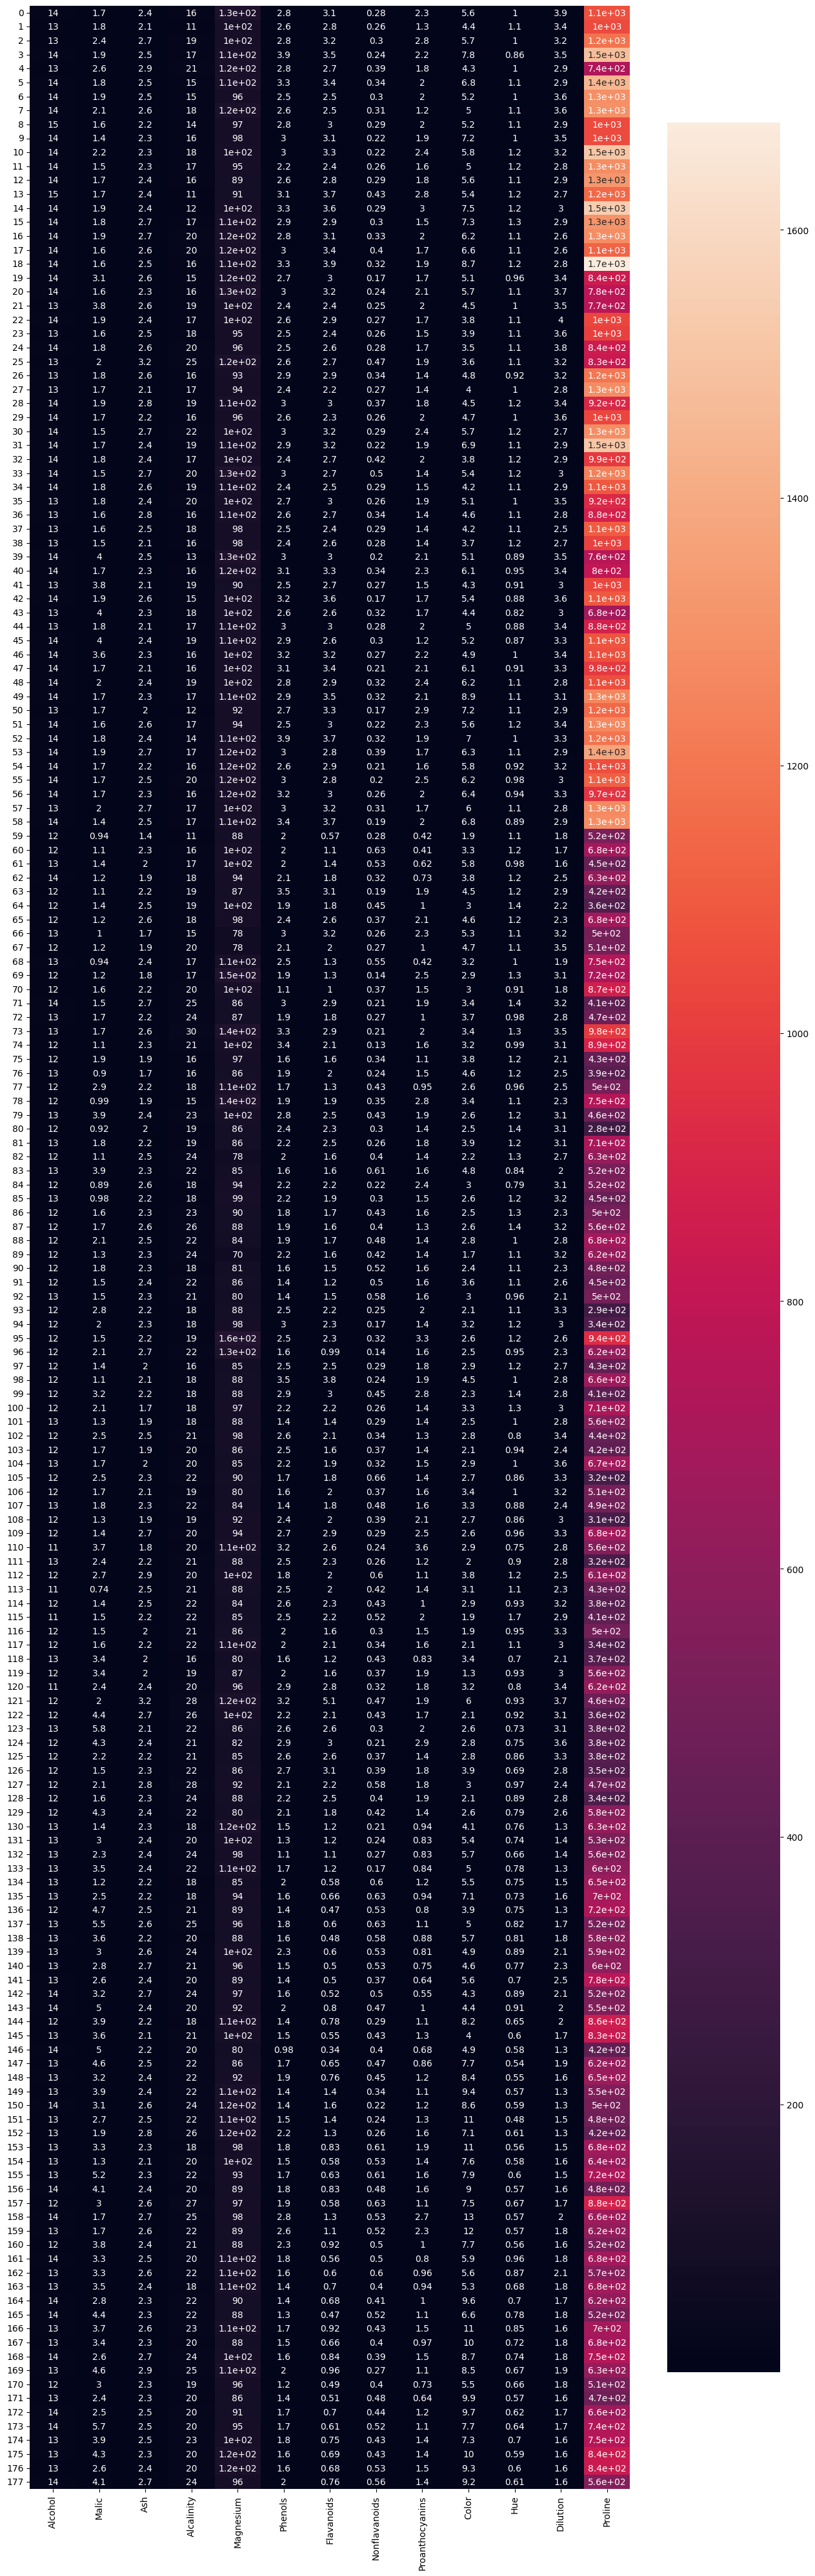

In [105]:
import seaborn as sns              #visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(15,50))
sns.heatmap(x,annot=True)

In [106]:
from sklearn.cluster import KMeans                     #kmeans algortihm implmentation for the original dataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [107]:
wcss=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,random_state=23)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

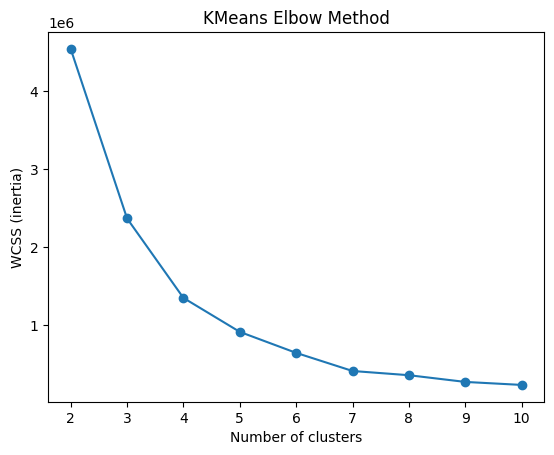

In [108]:
plt.plot(range(2,11),wcss,marker='o')             # using elbow curve method for optimal k value
plt.title('KMeans Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (inertia)')
plt.show()

In [109]:
kmeans = KMeans(n_clusters=4, random_state=42)         #k value selected is 4
k_labels = kmeans.fit_predict(x)
k_labels

array([1, 1, 1, 2, 3, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 3, 3, 3,
       1, 1, 3, 3, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3,
       3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 0, 3, 0, 3, 0, 0, 3,
       0, 0, 3, 3, 3, 0, 0, 1, 3, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 0, 0, 1, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 0, 3,
       3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 0], dtype=int32)

In [110]:
df['KMeans_Cluster'] = k_labels
df['KMeans_Cluster']

,KMeans_Cluster
0,1
1,1
2,1
3,2
4,3
...,...
173,3
174,3
175,3
176,3


In [111]:
label=kmeans.labels_
label

array([1, 1, 1, 2, 3, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 3, 3, 3,
       1, 1, 3, 3, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3,
       3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 0, 3, 0, 3, 0, 0, 3,
       0, 0, 3, 3, 3, 0, 0, 1, 3, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 0, 0, 1, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 0, 3,
       3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 0], dtype=int32)

In [112]:
print(silhouette_score(x,label))         #silhouette score for the original dataset

0.5669477723599623


<Axes: >

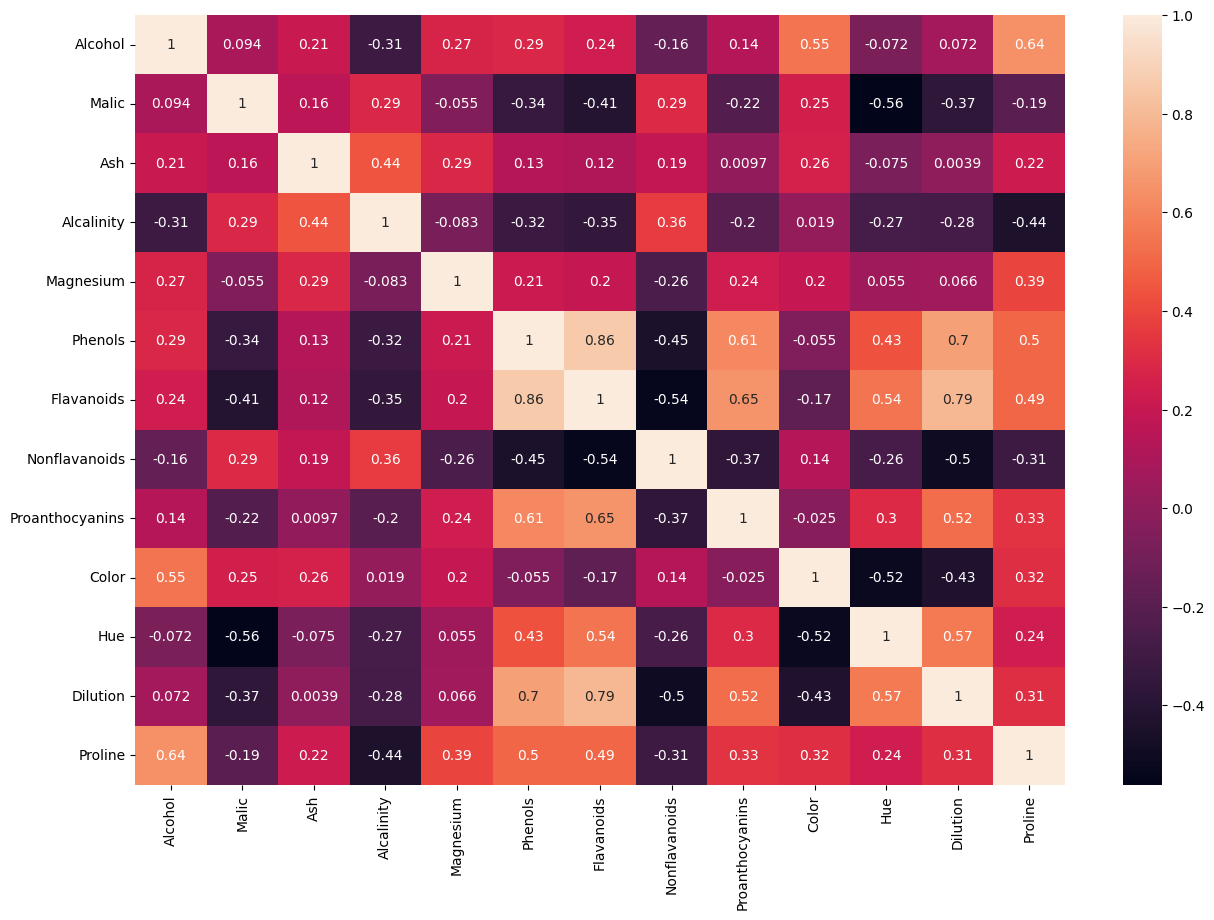

In [113]:
plt.figure(figsize=(15,10))               #visualization for principally calssified data
sns.heatmap(cov,annot=True)

In [114]:
import numpy as np
eigenvalues, eigenvectors=np.linalg.eig(cov)      # calculating eigenvalues and eigenvectors using linear algebra from numpy
print("Eigencvalues:",eigenvalues)
print("Eigenvectors:",eigenvectors)
print("Eigenvesctors:", eigenvectors.shape)

Eigencvalues: [4.70585025 2.49697373 1.44607197 0.91897392 0.85322818 0.64165703
 0.55102831 0.10337794 0.34849736 0.16877023 0.28887994 0.22578864
 0.25090248]
Eigenvectors: [[-0.1443294   0.48365155 -0.20738262  0.0178563  -0.26566365  0.21353865
   0.05639636 -0.01496997  0.39613926 -0.26628645 -0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758  0.22493093  0.08901289 -0.53689028  0.03521363  0.53681385
  -0.42052391 -0.02596375  0.06582674  0.12169604  0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106  0.31606881  0.6262239   0.21417556 -0.14302547  0.15447466
   0.14917061  0.14121803 -0.17026002 -0.04962237  0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041 -0.0105905   0.61208035 -0.06085941  0.06610294 -0.10082451
   0.28696914 -0.09168285  0.42797018 -0.05574287 -0.20044931  0.47931378
   0.05279942]
 [-0.14199204  0.299634    0.13075693  0.35179658  0.72704851  0.03814394
  -0.3228833  -0.05677422 -0.15636143  0.06222011 -0.27140257  0.07128891
   0.06787022]
 [-0.39466

In [115]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)   # cumulative sum is a ratio of each pricipal component analysis sequentially
explained_var

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.9013201 , 0.92812759, 0.94110992,
       0.96333145, 0.98069981, 1.        ])

In [116]:
n_components = np.argmax(explained_var >= 0.50) + 1         #It returns the arguments for target function that returns maximum value from the target function

In [117]:
#kmeans Algorithm for the PCA classified data
wcss=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,random_state=23)
  kmeans.fit(cov)
  wcss.append(kmeans.inertia_)


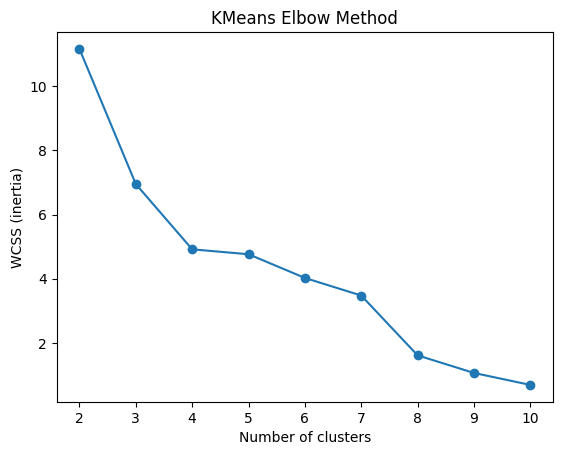

In [118]:
plt.plot(range(2,11),wcss,marker='o')             # using elbow curve method for optimal k value
plt.title('KMeans Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (inertia)')
plt.show()

In [119]:
kmeans = KMeans(n_clusters=3, random_state=42)
k_labels = kmeans.fit_predict(cov)
k_labels

array([2, 1, 2, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0], dtype=int32)

In [120]:
label=kmeans.labels_
label

array([2, 1, 2, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0], dtype=int32)

In [121]:
print(silhouette_score(cov,label))          # silhouette score for the pca classified data

0.3713682241339292


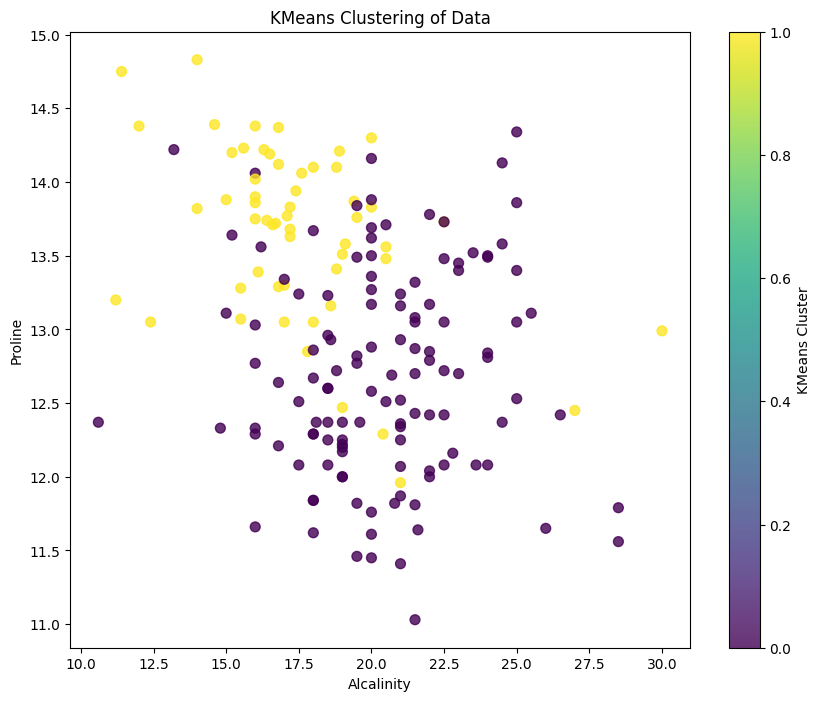

In [122]:
#cluster formation for the original dataset
plt.figure(figsize=(10, 8))
kmeans = KMeans(n_clusters=2, random_state=42) # Using n_clusters=2 as determined earlier
k_labels_x = kmeans.fit_predict(x)

plt.scatter(x['Alcalinity'], x['Alcohol'],c=k_labels_x,cmap='viridis', s=50, alpha=0.8)
plt.title('KMeans Clustering of Data')
plt.xlabel('Alcalinity')
plt.ylabel('Proline')
plt.colorbar(label='KMeans Cluster')
plt.show()

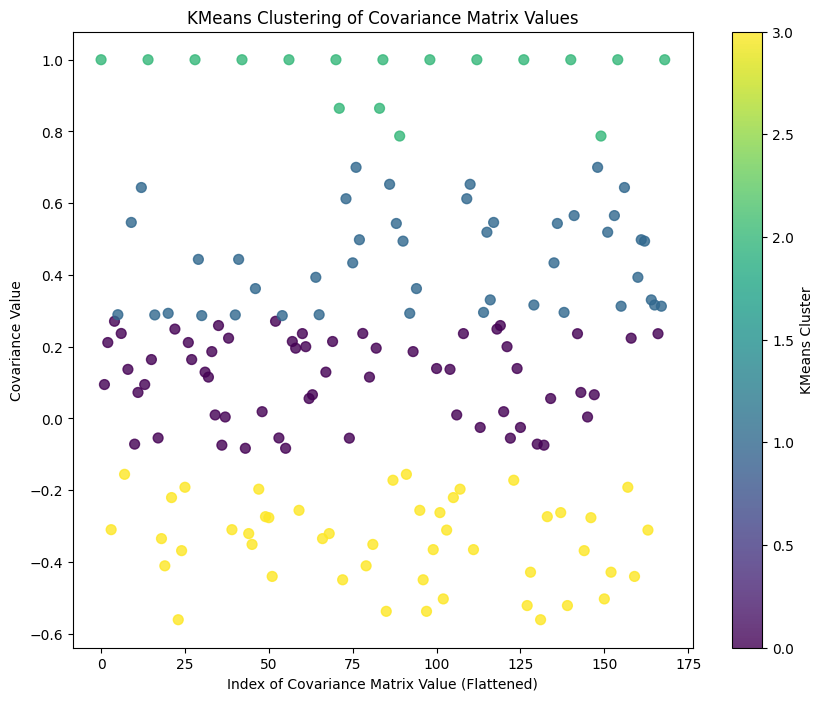

In [123]:
#cluster formation for the pca classified data
cov_np = cov.values.flatten().reshape(-1, 1)


kmeans_cov = KMeans(n_clusters=4, random_state=42) # Using n_clusters=4 as determined by the elbow method on cov
k_labels_cov = kmeans_cov.fit_predict(cov_np)

plt.figure(figsize=(10, 8))
plt.scatter(range(len(cov_np)), cov_np, c=k_labels_cov, cmap='viridis', s=50, alpha=0.8)
plt.title('KMeans Clustering of Covariance Matrix Values')
plt.xlabel('Index of Covariance Matrix Value (Flattened)')
plt.ylabel('Covariance Value')
plt.colorbar(label='KMeans Cluster')
plt.show()


In [ ]:
#Key Findings and Insights:
#PCA reduced dimensionality while preserving variance, and clustering revealed distinct groupings, improving interpretation of the dataset’s structure and relationships.

#Practical Implications:
#PCA simplifies complex data for better visualization and noise reduction, while clustering helps identify natural patterns and segment data for targeted analysis.

#Recommendations for Use:
#Use PCA when dealing with high-dimensional data to reduce redundancy; apply clustering when the goal is to uncover hidden group structures or segment populations.